### Analysis Section

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
import tensorflow as tf
import copy, math

In [3]:
df = pd.read_csv("/Users/mohamadrezasalehi/Journey/Kaggle trainings/Titanic/titanic/train.csv")

In [4]:
df.head(n = 10)

#parch: of parents / children aboard the Titanic
#embarked: Port of Embarkation
#pclass: Ticket class
#sibsp:  #of siblings / spouses aboard the Titanic


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
# Specify the column to move to the last position
column_to_move = 'Survived'
# Extract the column
moved_column = df.pop(column_to_move)
# 2. Drop the column from its current position
# The DataFrame df no longer contains the 'Survived' column
# It's now in the moved_column variable

#Reinsert the column at the end
df["Survived"] = moved_column

# Now, the column is in the last position of the DataFrame df



In [6]:
df["Cabin"].value_counts()
#just want to check which Cabin(s) is(are) the most frequent one(s) to use it in filling NaNs.

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [7]:
MostCommonCabins = ["B96", "B98", "G6", "C23", "C25", "C27"]

In [8]:
# Function to fill missing values randomly
def fill_missing_randomly(value):
    if pd.isnull(value):
        return random.choice(MostCommonCabins)
    else:
        return value

# Apply the fill_missing_randomly function to the "Cabin" column
df['Cabin'] = df['Cabin'].apply(fill_missing_randomly)

In [9]:
df["Age"] = df["Age"].fillna(df["Age"].median())
#I am using median of Age column to fill Nans, other option that I tried was the man value, but the results were not better.

In [10]:
df["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [11]:
df['Embarked'].fillna(value = 'S', inplace = True)

In [12]:
df.describe()
#Now, the data does not have any missing values, thus I provide a summary for the data

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.361582,0.523008,0.381594,32.204208,0.383838
std,257.353842,0.836071,13.019697,1.102743,0.806057,49.693429,0.486592
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,668.500000,3.000000,35.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


In [13]:
women = df.loc[df.Sex == "female"]["Survived"]
SurvivalRateWomen = sum(women)/len(women)

men = df.loc[df.Sex == "male"]["Survived"]
SurvivalRateMen = sum(men)/len(men)

print("{:.2}% of women survived in Titanic survived".format(SurvivalRateWomen))
print("{:.2}% of men survived in Titanic survived".format(SurvivalRateMen))

0.74% of women survived in Titanic survived
0.19% of men survived in Titanic survived


In [14]:
women = df.loc[(df.Sex == "female") & (df.SibSp == 1)]["Survived"]
SurvivalRateWomenSibSp = sum(women)/len(women)

men = df.loc[(df.Sex == "male") & (df.SibSp == 1)]["Survived"]
SurvivalRateMenSibSp = sum(men)/len(men)


print("{:.2}% of women with sibling or spouse survived in Titanic survived".format(SurvivalRateWomenSibSp))
print("{:.2}% of men with sibling or spouse survived in Titanic survived".format(SurvivalRateMenSibSp))

0.75% of women with sibling or spouse survived in Titanic survived
0.31% of men with sibling or spouse survived in Titanic survived


In [15]:
print(f"Hence, by having a sibling or spouse, the survival rate for women increases by {(SurvivalRateWomenSibSp - SurvivalRateWomen)*100:.2f}%, and this number for men is equal to {(SurvivalRateMenSibSp - SurvivalRateMen) * 100:.2f}%.")


Hence, by having a sibling or spouse, the survival rate for women increases by 1.27%, and this number for men is equal to 12.18%.


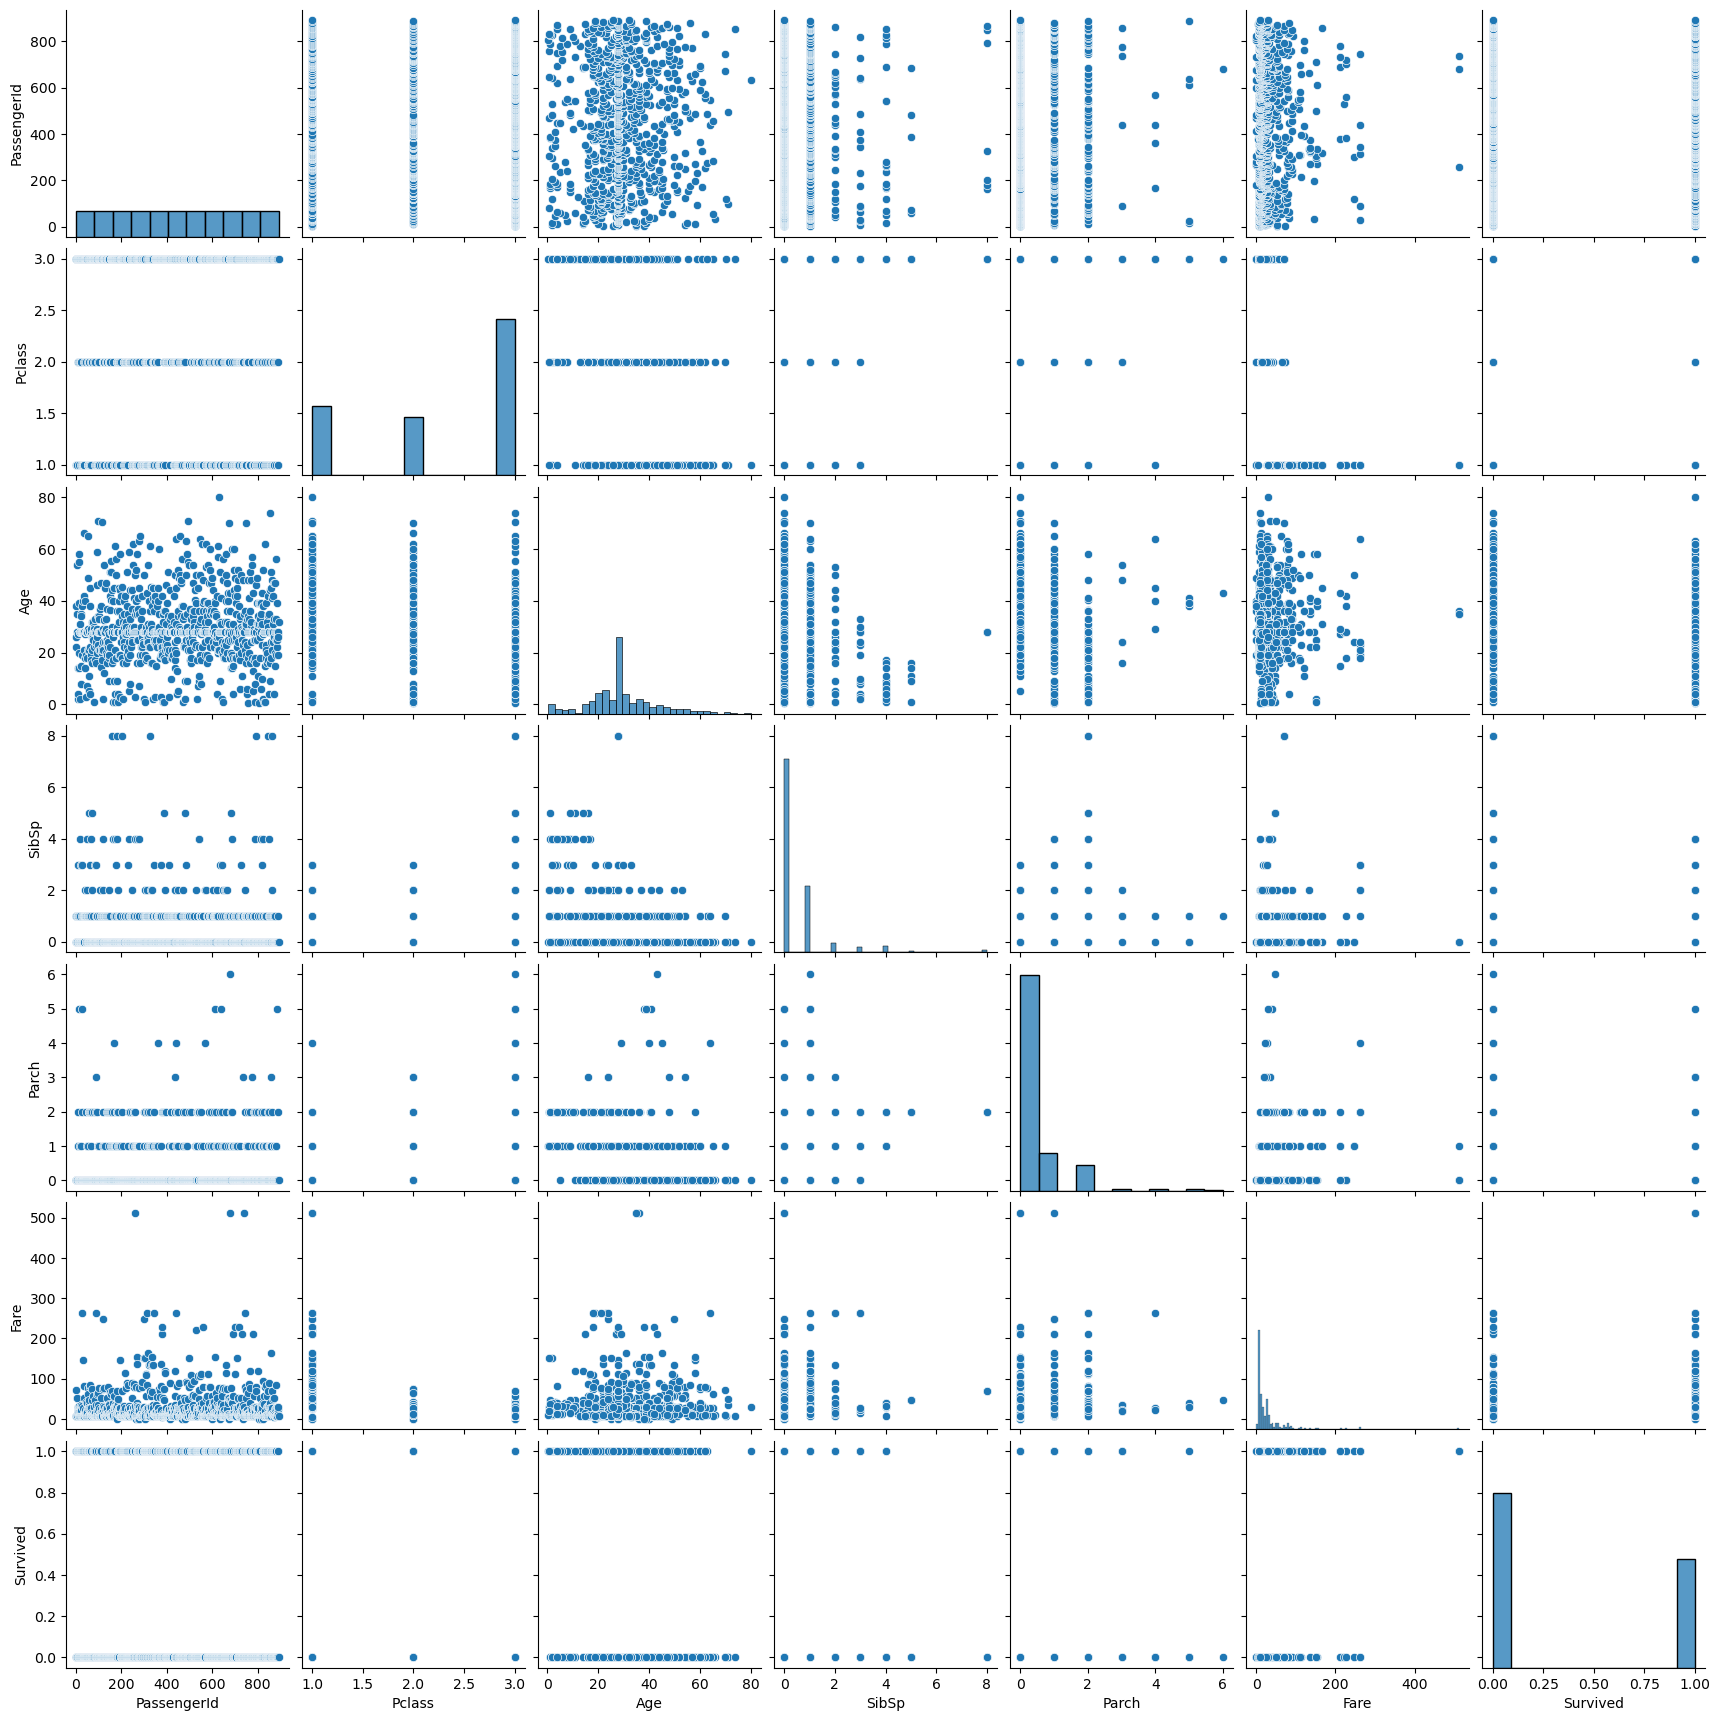

In [16]:
sns.pairplot(df)

<Axes: xlabel='Age', ylabel='Count'>

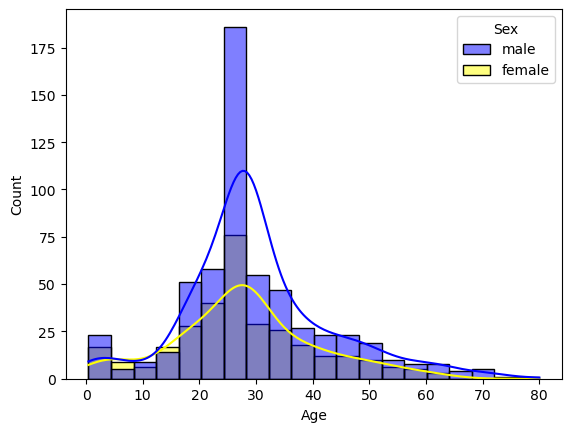

In [17]:
custom_palette = {"male": "blue", "female": "yellow"}
sns.histplot(data=df, x="Age",hue = "Sex",legend = True,bins = 20, kde=True, palette=custom_palette)
#It appears that, in nearly all age groups, except one, there were more men than women.

<Axes: xlabel='Age', ylabel='Count'>

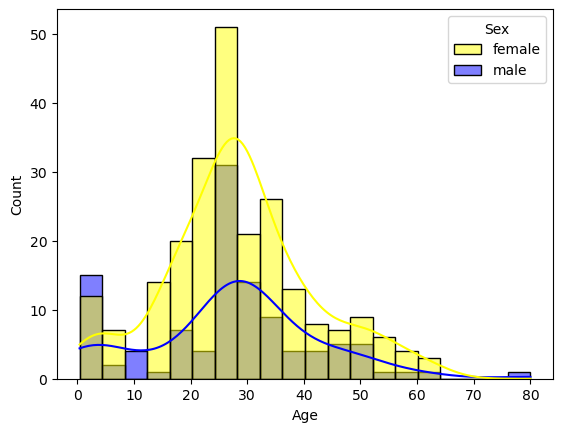

In [18]:
survivors_df = df[df["Survived"] == 1]
sns.histplot(data=survivors_df, x="Age",hue = "Sex",legend = True,bins = 20, kde=True, palette=custom_palette)

/var/folders/gc/dm7c6wn54kv89c8pyshdv6g80000gn/T/ipykernel_4653/4039163500.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap='cubehelix_r') #draws  heatmap with input as the correlation matrix calculted by(iris.corr())


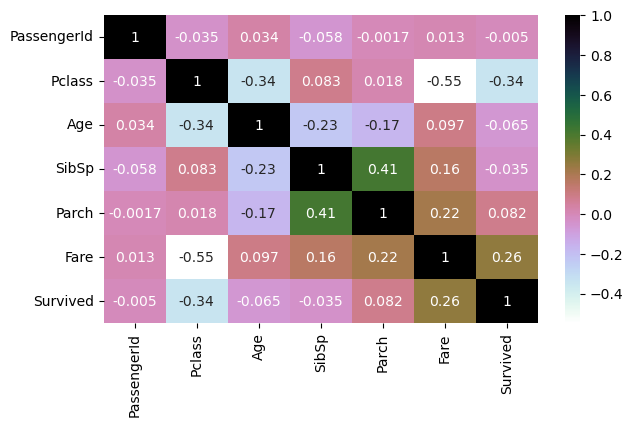

In [19]:
plt.figure(figsize=(7,4)) 
sns.heatmap(df.corr(),annot=True,cmap='cubehelix_r') #draws  heatmap with input as the correlation matrix calculted by(iris.corr())
plt.show()

Comparing the last two histograms, it is evident that although males were the majority in nearly every age group, women managed to survive across various age groups

# Machine Learning Section


## Data Preprocessing


In [81]:
df2 = df.drop(columns=df.columns[-3], axis = 1)

In [82]:
df2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,C25,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,G6,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,C27,S


In [83]:
X = df2.iloc[:, [2, 4, 5, 6, 7, 10]].values
y = df2.iloc[:, 1].values

In [84]:
#Encoding Embarked

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [-1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [85]:
#Encoding Pclass

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [86]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
column_to_encode = -4

# Apply LabelEncoder to the specified column
X[:, column_to_encode] = le.fit_transform(X[:, column_to_encode])

In [87]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [88]:
X[0, :]

array([0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1, 22.0, 1, 0], dtype=object)

In [89]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler
sc = StandardScaler()

# Define the column indices you want to standardize (4, 6, 7, 8, 9 in this example)
columns_to_standardize = [-1, -2, -3]

# Apply StandardScaler to the selected columns
X_train[:, columns_to_standardize] = sc.fit_transform(X_train[:, columns_to_standardize])
X_test[:, columns_to_standardize] = sc.transform(X_test[:, columns_to_standardize])


## Running Machine Learning from Scratch

In [121]:
def sigmoid(z):
    """
    Compute the sigmoid function for an input scalar or ndarray.
    
    Args:
    z (float or ndarray): Input value or ndarray.
    
    Returns:
    sigmoid(z) (float or ndarray): Sigmoid of z.
    """
    return 1 / (1 + np.exp(-z))

In [122]:
def compute_gradient_logistic(X, y, w, b): 
    """
    Computes the gradient for linear regression 
 
    Args:
      X (ndarray (m,n): Data, m examples with n features
      y (ndarray (m,)): target values
      w (ndarray (n,)): model parameters  
      b (scalar)      : model parameter
    Returns
      dj_dw (ndarray (n,)): The gradient of the cost w.r.t. the parameters w. 
      dj_db (scalar)      : The gradient of the cost w.r.t. the parameter b. 
    """
    m,n = X.shape
    dj_dw = np.zeros((n,))                           #(n,)
    dj_db = 0.

    for i in range(m):
        f_wb_i = sigmoid(np.dot(X[i],w) + b)          #(n,)(n,)=scalar
        err_i  = f_wb_i  - y[i]                       #scalar
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err_i * X[i,j]      #scalar
        dj_db = dj_db + err_i
    dj_dw = dj_dw/m                                   #(n,)
    dj_db = dj_db/m                                   #scalar
        
    return dj_db, dj_dw  

In [123]:
def gradient_descent(X, y, w_in, b_in, alpha, num_iters): 
    """
    Performs batch gradient descent
    
    Args:
      X (ndarray (m,n)   : Data, m examples with n features
      y (ndarray (m,))   : target values
      w_in (ndarray (n,)): Initial values of model parameters  
      b_in (scalar)      : Initial values of model parameter
      alpha (float)      : Learning rate
      num_iters (scalar) : number of iterations to run gradient descent
      
    Returns:
      w (ndarray (n,))   : Updated values of parameters
      b (scalar)         : Updated value of parameter 
    """
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in
    
    for i in range(num_iters):
        # Calculate the gradient and update the parameters
        dj_db, dj_dw = compute_gradient_logistic(X, y, w, b)   

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw               
        b = b - alpha * dj_db               
      
        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append( compute_cost_logistic(X, y, w, b) )

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]}   ")
        
    return w, b, J_history         #return final w,b and J history for graphing


In [124]:
w_tmp  = np.zeros_like(X_train[0])
b_tmp  = 0.
alph = 0.1
iters = 10000

w_out, b_out, _ = gradient_descent(X_train, y_train, w_tmp, b_tmp, alph, iters) 
print(f"\nupdated parameters: w:{w_out}, b:{b_out}")

Iteration    0: Cost 0.6798119581638805   
Iteration 1000: Cost 0.4464608120019245   
Iteration 2000: Cost 0.44646074100405264   
Iteration 3000: Cost 0.4464607410035092   
Iteration 4000: Cost 0.44646074100350847   
Iteration 5000: Cost 0.4464607410035087   
Iteration 6000: Cost 0.44646074100350924   
Iteration 7000: Cost 0.44646074100350924   
Iteration 8000: Cost 0.44646074100350924   
Iteration 9000: Cost 0.44646074100350924   

updated parameters: w:[ 0.51425573  0.07607391 -0.50309788  0.04939202  0.07603456 -0.09172248
 -1.27925737 -0.56463069 -0.41512845 -0.03033849], b:-0.6582510016507985


In [128]:
import numpy as np

def predict(X, w, b):
    """
    Make predictions using logistic regression model.
    
    Args:
      X (ndarray (m,n)): Data, m examples with n features
      w (ndarray (n,)) : Model parameters
      b (scalar)       : Model parameter
      
    Returns:
      predictions (ndarray (m,)): Predicted values (0 or 1)
    """
    z = np.dot(X, w) + b
    probabilities = 1 / (1 + np.exp(-z))
    predictions = (probabilities >= 0.5).astype(int)
    return predictions

def accuracy_score(y_true, y_pred):
    """
    Compute the accuracy score.
    
    Args:
      y_true (ndarray (m,)): Actual target values (0 or 1)
      y_pred (ndarray (m,)): Predicted values (0 or 1)
      
    Returns:
      accuracy (float): Accuracy score (between 0 and 1)
    """
    m = len(y_true)
    correct_predictions = np.sum(y_true == y_pred)
    accuracy = correct_predictions / m
    return accuracy

# Example usage
y_test_pred = predict(X_test, w_out, b_out)
accuracy = accuracy_score(y_test, y_test_pred)
print(f"Accuracy on the training set: {accuracy:.2f}")


Accuracy on the training set: 0.67


The predictive accuracy is currently not good. Let's explore another methods for this purpose.

## Running Some Classifiers Using sklearn

In [90]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=42)

In [91]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]

In [92]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[96 14]
 [19 50]]


0.8156424581005587

In [93]:
from sklearn.svm import SVC
kernel = SVC(kernel = 'rbf', random_state = 0)
kernel.fit(X_train, y_train)
y_pred = kernel.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [1 0]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]

In [94]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[97 13]
 [19 50]]


0.8212290502793296

In [95]:
from sklearn.model_selection import GridSearchCV
parameters = [{'C': [0.25, 0.5, 0.75, 1], 'kernel': ['linear']},
              {'C': [0.25, 0.5, 0.75, 1], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]
grid_search = GridSearchCV(estimator = kernel,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 83.16 %
Best Parameters: {'C': 0.75, 'gamma': 0.2, 'kernel': 'rbf'}


In [96]:
from xgboost import XGBClassifier
xg = XGBClassifier()
xg.fit(X_train, y_train)
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = xg.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[100  10]
 [ 19  50]]


0.8379888268156425

In [97]:
# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [100, 200, 300],        # Number of trees
    'max_depth': [3, 4, 5],                # Maximum tree depth
    'learning_rate': [0.01, 0.1, 0.2],    # Learning rate
    # Add other hyperparameters you want to tune
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=xg, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Perform grid search and find the best parameters
grid_search.fit(X, y)

# Print the best hyperparameters and the best score
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)


Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best Parameters:  {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Best Score:  0.8282828282828283


In [98]:
import tensorflow as tf
import numpy as np
from sklearn.preprocessing import StandardScaler

# Convert X_train and y_train to float32
X_train = X_train.astype('float32')
y_train = y_train.astype('float32')
X_test = X_test.astype('float32')
y_test= y_test.astype('float32')

# Normalize or scale your input data (optional but recommended)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

# Create and compile your model
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit your model
ann.fit(X_train, y_train, batch_size=32, epochs=100)

Epoch 1/100
23/23 [==============================] - 0s 468us/step - loss: 0.7921 - accuracy: 0.3441
Epoch 2/100
23/23 [==============================] - 0s 324us/step - loss: 0.7576 - accuracy: 0.3624
Epoch 3/100
23/23 [==============================] - 0s 346us/step - loss: 0.7317 - accuracy: 0.4537
Epoch 4/100
23/23 [==============================] - 0s 445us/step - loss: 0.7133 - accuracy: 0.5197
Epoch 5/100
23/23 [==============================] - 0s 394us/step - loss: 0.6989 - accuracy: 0.5351
Epoch 6/100
23/23 [==============================] - 0s 405us/step - loss: 0.6874 - accuracy: 0.5309
Epoch 7/100
23/23 [==============================] - 0s 370us/step - loss: 0.6774 - accuracy: 0.5197
Epoch 8/100
23/23 [==============================] - 0s 415us/step - loss: 0.6682 - accuracy: 0.5267
Epoch 9/100
23/23 [==============================] - 0s 402us/step - loss: 0.6589 - accuracy: 0.5702
Epoch 10/100
23/23 [==============================] - 0s 362us/step - loss: 0.6503 - accura

In [490]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

6/6 [==============================] - 0s 444us/step
[[0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 1.]
 [0. 1.]
 [0. 1.]
 [0. 0.]
 [0. 1.]
 [0. 0.]
 [0. 1.]
 [0. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 1.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 1.]
 [0. 0.]
 [0. 1.]
 [0. 1.]
 [0. 0.]
 [0. 0.]
 [0. 1.]
 [0. 0.]
 [0. 1.]
 [0. 0.]
 [0. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 1.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 0.]
 [0. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 1.]
 [0. 0.]
 [0. 0.]
 [0. 1.]
 [0. 0.]
 [0. 1.]
 [0. 0.]
 [0. 1.]
 [0. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 1.]
 [1. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 1.]
 [1. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 0.]
 [0. 0.]
 [0. 1.]
 [0. 1.]
 [0. 0.]
 [0. 0.]
 [0. 1.]
 [0. 0.]
 [0. 0.]
 [0. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [

In [99]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[100  10]
 [ 19  50]]


0.8379888268156425

[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.0s
[CV] END ..learning_rate=0.01, max_depth=4, n_estimators=100; total time=   0.0s
[CV] END ..learning_rate=0.01, max_depth=4, n_estimators=200; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=200; total time=   0.1s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=200; total time=   0.0s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=300; total time=   0.1s
[CV] END ...learning_rate=0.1, max_depth=5, n_estimators=300; total time=   0.1s
[CV] END ...learning_rate=0.1, max_depth=5, n_estimators=300; total time=   0.1s
[CV] END ...learning_rate=0.2, max_depth=5, n_estimators=200; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.0s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=300; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=4, n_estimators=300; total time=   0.1s
[CV] END ...learning_rate=0.